In [56]:
!cp '/content/drive/MyDrive/DL FILES/cat_dog_dataset.zip'

cp: missing destination file operand after '/content/drive/MyDrive/DL FILES/cat_dog_dataset.zip'
Try 'cp --help' for more information.


In [58]:
!unzip '/content/drive/MyDrive/DL FILES/cat_dog_dataset.zip'

Archive:  /content/drive/MyDrive/DL FILES/cat_dog_dataset.zip
replace content/cat_dog_dataset/dog/dog.2081.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #To train dataset imagedatagenerator function is imported

#model building functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [60]:
dataset_path = '/content/content/cat_dog_dataset'

In [61]:
#hyperparameters
# how many images should be used at each iteration - batch_size, commonly used 32, given in multiple of 32
batch_size = 32
epochs = 10
image_size = (150,150)


In [62]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
) #1. pixel of each pic size is taken, validation_split - 2% of dataset is used as testing data

In [63]:
training_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

Found 8000 images belonging to 2 classes.


In [64]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)


Found 2000 images belonging to 2 classes.


In [65]:
image_size[0]

150

In [66]:
#model building
model = Sequential()
#convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3))) #add convolution layer #32 filters, can be 32,64, etc. 3*3 size,image shape already decided (150,150)

#max_pooling should be done only after adding convolution layers
#pooling layers
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer
model.add(Flatten())
#22500 pixels/unit(150*150)
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [71]:
history =model.fit(
    training_generator,
    steps_per_epoch = training_generator.samples/batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples/batch_size,
    epochs = epochs
)

Epoch 1/10
250/250 [==============================] - 24s 76ms/step - loss: 0.8351 - accuracy: 0.6440 - val_loss: 0.5863 - val_accuracy: 0.6955
Epoch 2/10
250/250 [==============================] - 18s 72ms/step - loss: 0.4619 - accuracy: 0.7836 - val_loss: 0.5989 - val_accuracy: 0.6915
Epoch 3/10
250/250 [==============================] - 18s 74ms/step - loss: 0.2944 - accuracy: 0.8760 - val_loss: 0.6578 - val_accuracy: 0.6905
Epoch 4/10
250/250 [==============================] - 20s 82ms/step - loss: 0.1596 - accuracy: 0.9456 - val_loss: 0.9065 - val_accuracy: 0.6700
Epoch 5/10
250/250 [==============================] - 19s 74ms/step - loss: 0.0844 - accuracy: 0.9789 - val_loss: 0.9366 - val_accuracy: 0.6960
Epoch 6/10
250/250 [==============================] - 18s 71ms/step - loss: 0.0466 - accuracy: 0.9912 - val_loss: 1.1852 - val_accuracy: 0.6940
Epoch 7/10
250/250 [==============================] - 21s 82ms/step - loss: 0.0308 - accuracy: 0.9939 - val_loss: 1.3214 - val_accuracy:

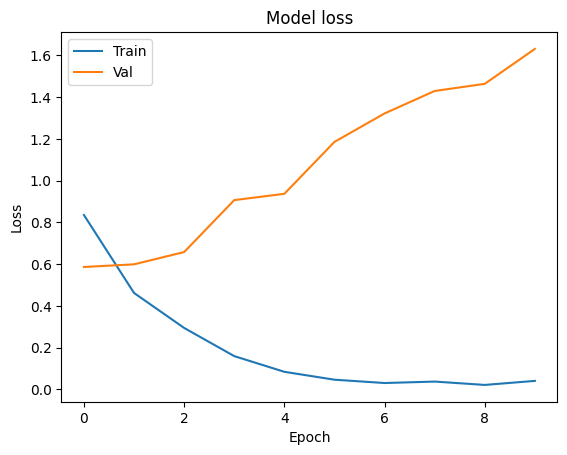

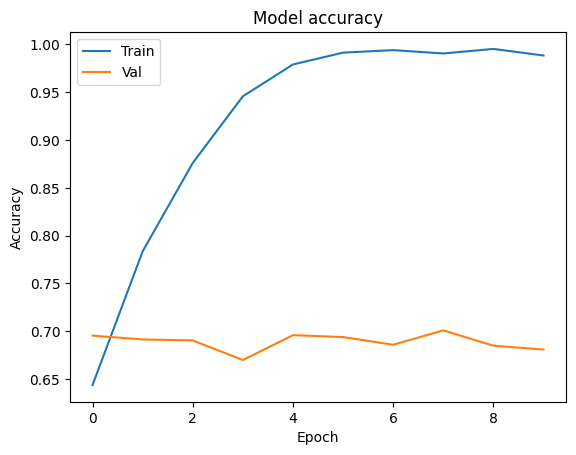

In [74]:
# prompt: plot graph of loss and accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [76]:
#model building
model_2 = Sequential()
#convolution layer
model_2.add(Conv2D(64,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3))) #add convolution layer #32 filters, can be 32,64, etc. 3*3 size,image shape already decided (150,150)
model_2.add(Conv2D(128,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3))) #add convolution layer #32 filters, can be 32,64, etc. 3*3 size,image shape already decided (150,150)

#pooling layers
model_2.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer
model_2.add(Flatten())
#22500 pixels/unit(150*150)
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [77]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [80]:
history_2 =model_2.fit(
    training_generator,
    steps_per_epoch = training_generator.samples/batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples/batch_size,
    epochs = epochs
)

Epoch 1/10
250/250 [==============================] - 31s 123ms/step - loss: 0.0174 - accuracy: 0.9960 - val_loss: 1.6381 - val_accuracy: 0.6950
Epoch 2/10
250/250 [==============================] - 31s 124ms/step - loss: 0.0122 - accuracy: 0.9980 - val_loss: 1.8842 - val_accuracy: 0.7005
Epoch 3/10
250/250 [==============================] - 31s 124ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 2.1599 - val_accuracy: 0.7090
Epoch 4/10
250/250 [==============================] - 31s 124ms/step - loss: 6.6412e-04 - accuracy: 0.9999 - val_loss: 2.3444 - val_accuracy: 0.7025
Epoch 5/10
250/250 [==============================] - 32s 127ms/step - loss: 3.6108e-04 - accuracy: 0.9999 - val_loss: 2.5181 - val_accuracy: 0.7005
Epoch 6/10
250/250 [==============================] - 31s 125ms/step - loss: 2.5942e-04 - accuracy: 0.9999 - val_loss: 2.6472 - val_accuracy: 0.7045
Epoch 7/10
250/250 [==============================] - 31s 125ms/step - loss: 2.0758e-04 - accuracy: 0.9999 - val_loss:

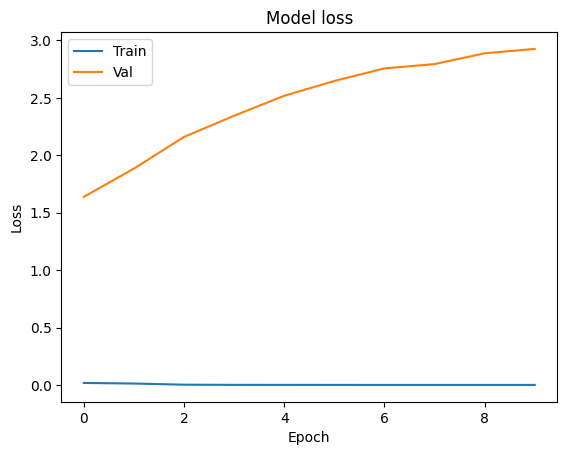

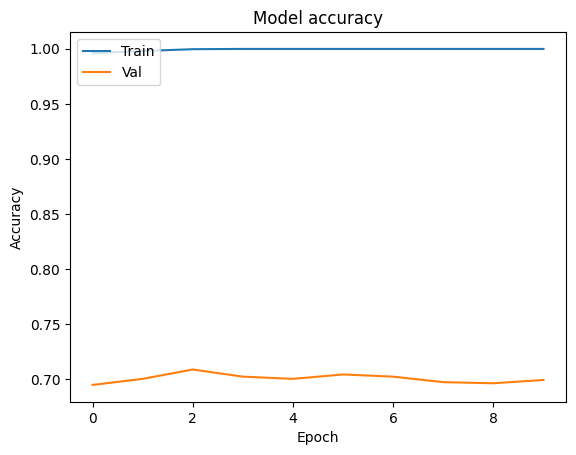

In [84]:
# prompt: plot graph of loss and accuracy

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [86]:
model.save('cat_dog_Detection.h5')

In [89]:
#prediction

from tensorflow.keras.preprocessing import image
import numpy as np


In [94]:
def predict_image(image_path):
  img = image.load_img(image_path,target_size=image_size) #load image
  img = image.img_to_array(img) #converting to array
  img = np.expand_dims(img,axis=0) #expanding dimensions to match with model
  img /=255.0  #normalize image pixels

  result = model.predict(img)
  return 'Cat' if result < 0.5 else 'Dog'

In [99]:
img = '/content/Cat.jpeg'
predict = predict_image(img)
print(predict)

1/1 [==============================] - 0s 19ms/step
Cat
